In [23]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

In [24]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

C:\Users\tousp\anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [25]:
nc.variables

OrderedDict([('time', <scipy.io.netcdf.netcdf_variable at 0x1edfb854488>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x1edfb854888>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x1edfb854648>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x1edfb843788>),
             ('level', <scipy.io.netcdf.netcdf_variable at 0x1edfb843748>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x1edfb843408>)])

In [26]:
nc.dimensions

OrderedDict([('time', None),
             ('bnds', 2),
             ('longitude', 512),
             ('latitude', 256),
             ('level', 37)])

In [27]:
times = nc.variables["time"]
u = nc.variables["u"]

In [28]:
u.shape

(12, 37, 256, 512)

In [29]:
times.shape

(12,)

In [30]:
u[0, 0, 0, 0]

-34.00075

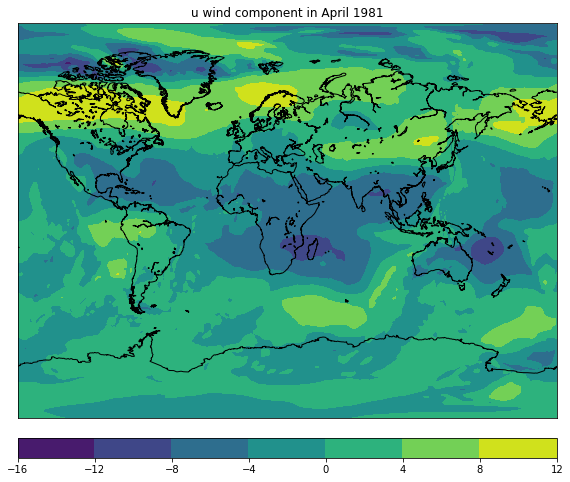

In [62]:
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, u[4,-1,:,:]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("u wind component in April 1981")
plt.show()

<h2>Plotting the u wind component for every month in 1981</h2>

In [64]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


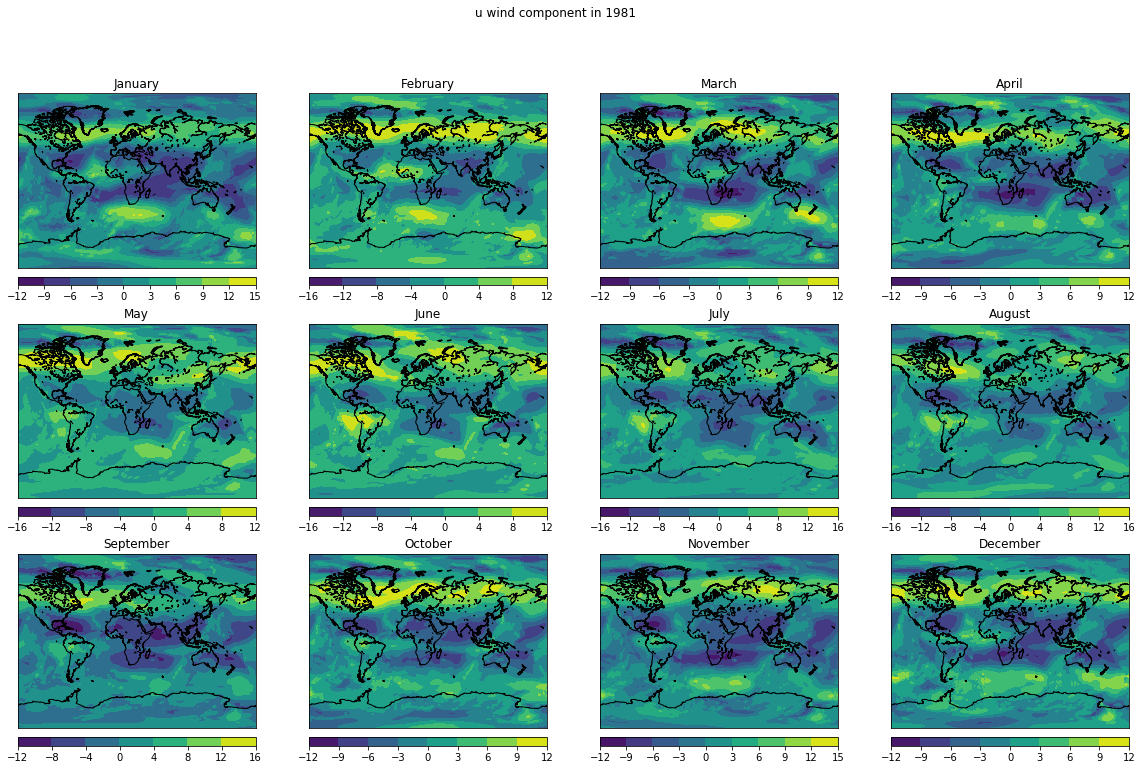

In [65]:
fig, axes =plt.subplots(figsize = (20,12), nrows=3, ncols=4)


for i, ax in enumerate(axes.flat):
    m = Basemap(projection='mill',lon_0=30,resolution='l', ax=ax)
    m.drawcoastlines()

    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    cs = m.contourf(x, y, u[i,-1,:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
    ax.set_title(months[i])
    cbar = m.colorbar(cs,location='bottom',pad="5%") #Colorbar should be the same for every plot?
    
fig.suptitle("u wind component in 1981")
plt.show()